# Observations/Assumptions made pertaining to data:

a) mice that died during the process was useless data because it wasnt complete and not correct to compare partial results to full results, (i.e. how do you represent the average tumour size over multiple time periods)

b) that the mice did die because they removed it from the dataset, and would have included it to highlight the success if they were still alive,  
c) it would be unfair to the reader of the work i am doing to have partial data represented in the graphs because it wouldnt show the complete trend the data is intended to hopefully provide and finally 
d) that the mice died from natural causes (or the tumour itself) or at the very least causes that could not be inextricably linked to the regimen it was being treated with, therefore not related to the success rate of the drug.
e) all mice started with the same sized tumour (45mm3), therefore the best method of calculating which regimen was most successful would have been to calculate the average tumour size at the end of the period for each drug regimen and the lowest average would then represent the most successful results.
f) because i did remove data for mice not reaching the end of the research period, I am aware that outliers may have been included in the dataset and were removed, but because of the above assumptions I dont believe they are truly outliers because they should not have been included in the analysis to begin with.


In [171]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from sklearn import datasets 
from scipy.stats import linregress

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [172]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_list = data_df["Drug Regimen"].unique()
print(regimen_list)

['Ramicane' 'Capomulin' 'Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn'
 'Zoniferol' 'Ketapril' 'Propriva' 'Naftisol']


In [173]:
#remove rows for which the timepoint is not final (Timepoint == 45)
regimen_final_time = data_df.copy()
regimen_final_time = regimen_final_time.loc[regimen_final_time["Timepoint"] == 45, :]
regimen_group_time = regimen_final_time.groupby("Drug Regimen")

In [174]:
stat_1 = regimen_group_time.get_group(regimen_list[0])
stat_2 = regimen_group_time.get_group(regimen_list[1])
stat_3 = regimen_group_time.get_group(regimen_list[2])
stat_4 = regimen_group_time.get_group(regimen_list[3])
stat_5 = regimen_group_time.get_group(regimen_list[4])
stat_6 = regimen_group_time.get_group(regimen_list[5])
stat_7 = regimen_group_time.get_group(regimen_list[6])
stat_8 = regimen_group_time.get_group(regimen_list[7])
stat_9 = regimen_group_time.get_group(regimen_list[8])
stat_10 = regimen_group_time.get_group(regimen_list[9])


stat_1 = stat_1.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_2 = stat_2.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_3 = stat_3.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_4 = stat_4.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_5 = stat_5.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_6 = stat_6.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_7 = stat_7.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_8 = stat_8.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_9 = stat_9.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])
stat_10 = stat_10.drop(columns=["Sex", "Age_months", "Weight (g)", "Timepoint", "Metastatic Sites"])

final_reg_df = pd.concat([stat_1, stat_2, stat_3, stat_4, stat_5, stat_6, stat_7, stat_8, stat_9, stat_10])

In [175]:
reg1_sum = stat_1["Tumor Volume (mm3)"].sum()
reg1_mean = stat_1["Tumor Volume (mm3)"].mean()
reg1_median = stat_1["Tumor Volume (mm3)"].median()
reg1_var = stat_1["Tumor Volume (mm3)"].var()
reg1_std = stat_1["Tumor Volume (mm3)"].std()
reg1_sem = stat_1["Tumor Volume (mm3)"].sem()

reg2_sum = stat_2["Tumor Volume (mm3)"].sum()
reg2_mean = stat_2["Tumor Volume (mm3)"].mean()
reg2_median = stat_2["Tumor Volume (mm3)"].median()
reg2_var = stat_2["Tumor Volume (mm3)"].var()
reg2_std = stat_2["Tumor Volume (mm3)"].std()
reg2_sem = stat_2["Tumor Volume (mm3)"].sem()

reg3_sum = stat_3["Tumor Volume (mm3)"].sum()
reg3_mean = stat_3["Tumor Volume (mm3)"].mean()
reg3_median = stat_3["Tumor Volume (mm3)"].median()
reg3_var = stat_3["Tumor Volume (mm3)"].var()
reg3_std = stat_3["Tumor Volume (mm3)"].std()
reg3_sem = stat_3["Tumor Volume (mm3)"].sem()

reg4_sum = stat_4["Tumor Volume (mm3)"].sum()
reg4_mean = stat_4["Tumor Volume (mm3)"].mean()
reg4_median = stat_4["Tumor Volume (mm3)"].median()
reg4_var = stat_4["Tumor Volume (mm3)"].var()
reg4_std = stat_4["Tumor Volume (mm3)"].std()
reg4_sem = stat_4["Tumor Volume (mm3)"].sem()

reg5_sum = stat_5["Tumor Volume (mm3)"].sum()
reg5_mean = stat_5["Tumor Volume (mm3)"].mean()
reg5_median = stat_5["Tumor Volume (mm3)"].median()
reg5_var = stat_5["Tumor Volume (mm3)"].var()
reg5_std = stat_5["Tumor Volume (mm3)"].std()
reg5_sem = stat_5["Tumor Volume (mm3)"].sem()

reg6_sum = stat_6["Tumor Volume (mm3)"].sum()
reg6_mean = stat_6["Tumor Volume (mm3)"].mean()
reg6_median = stat_6["Tumor Volume (mm3)"].median()
reg6_var = stat_6["Tumor Volume (mm3)"].var()
reg6_std = stat_6["Tumor Volume (mm3)"].std()
reg6_sem = stat_6["Tumor Volume (mm3)"].sem()

reg7_sum = stat_7["Tumor Volume (mm3)"].sum()
reg7_mean = stat_7["Tumor Volume (mm3)"].mean()
reg7_median = stat_7["Tumor Volume (mm3)"].median()
reg7_var = stat_7["Tumor Volume (mm3)"].var()
reg7_std = stat_7["Tumor Volume (mm3)"].std()
reg7_sem = stat_7["Tumor Volume (mm3)"].sem()

reg8_sum = stat_8["Tumor Volume (mm3)"].sum()
reg8_mean = stat_8["Tumor Volume (mm3)"].mean()
reg8_median = stat_8["Tumor Volume (mm3)"].median()
reg8_var = stat_8["Tumor Volume (mm3)"].var()
reg8_std = stat_8["Tumor Volume (mm3)"].std()
reg8_sem = stat_8["Tumor Volume (mm3)"].sem()

reg9_sum = stat_9["Tumor Volume (mm3)"].sum()
reg9_mean = stat_9["Tumor Volume (mm3)"].mean()
reg9_median = stat_9["Tumor Volume (mm3)"].median()
reg9_var = stat_9["Tumor Volume (mm3)"].var()
reg9_std = stat_9["Tumor Volume (mm3)"].std()
reg9_sem = stat_9["Tumor Volume (mm3)"].sem()

reg10_sum = stat_10["Tumor Volume (mm3)"].sum()
reg10_mean = stat_10["Tumor Volume (mm3)"].mean()
reg10_median = stat_10["Tumor Volume (mm3)"].median()
reg10_var = stat_10["Tumor Volume (mm3)"].var()
reg10_std = stat_10["Tumor Volume (mm3)"].std()
reg10_sem = stat_10["Tumor Volume (mm3)"].sem()

In [176]:
stat_table = pd.DataFrame({
    "mean" : [reg1_mean, reg2_mean, reg3_mean, reg4_mean,reg5_mean, reg6_mean,reg7_mean, reg8_mean,reg9_mean, reg10_mean],
    "median" : [reg1_median, reg2_median, reg3_median, reg4_median, reg5_median, reg6_median, reg7_median, reg8_median, reg9_median, reg10_median],
    "Variance" : [reg1_var, reg2_var, reg3_var, reg4_var, reg5_var, reg6_var, reg7_var, reg8_var, reg9_var, reg10_var],
    "Standard Deviation" : [reg1_std, reg2_std, reg3_std, reg4_std, reg5_std, reg6_std, reg7_std, reg8_std, reg9_std, reg10_std],
    "SEM": [reg1_sem, reg2_sem, reg3_sem, reg4_sem, reg5_sem, reg6_sem, reg7_sem, reg8_sem, reg9_sem, reg10_sem],
    "Count": [len(stat_1), len(stat_2), len(stat_3), len(stat_4), len(stat_5), len(stat_6), len(stat_7), len(stat_8), len(stat_9), len(stat_10), ]
},
    index = [regimen_list[0], regimen_list[1],regimen_list[2], regimen_list[3],regimen_list[4], regimen_list[5],regimen_list[6], regimen_list[7],regimen_list[8], regimen_list[9]])


In [177]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
stat_table


,mean,median,Variance,Standard Deviation,SEM,Count
Ramicane,34.955595,34.848627,30.101010,5.486439,1.226805,20
Capomulin,36.236114,37.311846,31.460537,5.608969,1.223977,21
Infubinol,65.755562,66.083066,11.787426,3.433282,1.144427,9
Placebo,68.084082,69.042841,20.098783,4.483167,1.351726,11
Ceftamin,64.132421,64.299830,10.585242,3.253497,0.902358,13
Stelasyn,68.438310,69.299149,27.340818,5.228845,1.576556,11
Zoniferol,65.960888,65.684689,14.100301,3.755037,1.003576,14
Ketapril,70.662958,69.872251,23.229260,4.819674,1.453186,11
Propriva,66.258529,64.957562,24.967290,4.996728,1.888586,7
Naftisol,69.265506,69.563621,26.079104,5.106770,1.416363,13


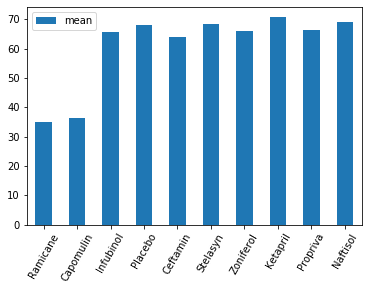

In [178]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
# DATA SET
stat_table.plot.bar(y="mean", rot=60)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

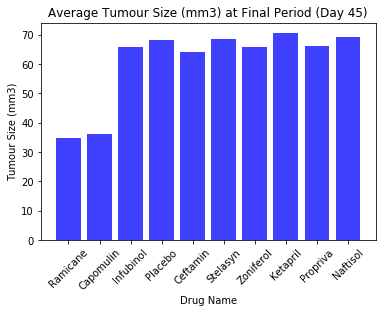

In [179]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
Drugs = regimen_list
Tumour_Volume = stat_table["mean"]
x_axis = np.arange(0, len(Drugs))
tick_locations = []
for x in x_axis:
    tick_locations.append(x)


plt.bar(x_axis, Tumour_Volume, facecolor="blue", alpha=.75, align="center")
plt.xticks(tick_locations, Drugs)
plt.title("Average Tumour Size (mm3) at Final Period (Day 45)")
plt.xlabel("Drug Name")
plt.ylabel("Tumour Size (mm3)")
plt.xticks(rotation=45)

In [180]:
# extracting gender groups for the mice at the beggining and end of the study
gender_df_beg = data_df.copy()
gender_df_beg = data_df.loc[data_df["Timepoint"] == 0, :]

gender_df_end = data_df.copy()
gender_df_end = data_df.loc[data_df["Timepoint"] == 45, :]

gender_df_beg = gender_df_beg.groupby("Sex")
male_mice_beg = gender_df_beg["Mouse ID"].get_group("Male").count()
female_mice_beg = gender_df_beg["Mouse ID"].get_group("Female").count()

gender_df_end = gender_df_end.groupby("Sex")
male_mice_end = gender_df_end["Mouse ID"].get_group("Male").count()
female_mice_end = gender_df_end["Mouse ID"].get_group("Female").count()

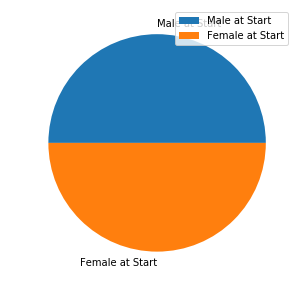

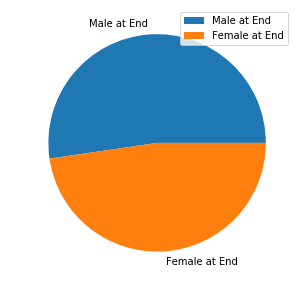

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_pie_beg = pd.DataFrame({
    " ":[male_mice_beg, female_mice_beg]},
    index=["Male at Start", "Female at Start"])
gender_pie_beg_plot = gender_pie_beg.plot.pie(y=" ", figsize=(5, 5), rot=90)


gender_pie_end = pd.DataFrame({
    " ":[male_mice_end, female_mice_end]},
    index=["Male at End", "Female at End"])
gender_pie_end_plot = gender_pie_end.plot.pie(y=" ", figsize=(5, 5), rot=90)

Text(0.5, 1.0, 'Gender Portions at Start of Research Period')

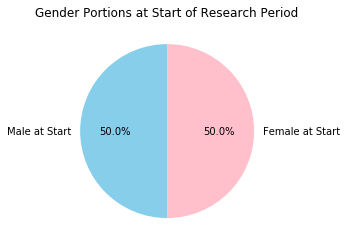

In [182]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
Gender_beg = ("Male at Start", "Female at Start")
Gender_Portion_beg = (male_mice_beg, female_mice_beg)
colors= ("SkyBlue", "Pink")

plt.pie(Gender_Portion_beg, labels=Gender_beg, colors=colors, autopct="%1.1f%%",startangle=90)
plt.title("Gender Portions at Start of Research Period")

Text(0.5, 1.0, 'Gender Portions at End of Research Period')

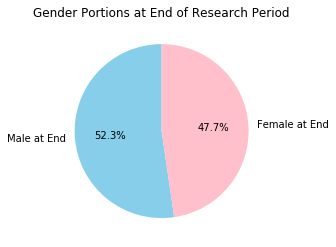

In [183]:
Gender_end = ("Male at End", "Female at End")
Gender_Portion_end = (male_mice_end, female_mice_end)
colors= ("SkyBlue", "Pink")

plt.pie(Gender_Portion_end, labels=Gender_end, colors=colors, autopct="%1.1f%%",startangle=90)
plt.title("Gender Portions at End of Research Period")

In [184]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
best_reg = stat_table["mean"].nsmallest(4)
print(best_reg)


Ramicane     34.955595
Capomulin    36.236114
Ceftamin     64.132421
Infubinol    65.755562
Name: mean, dtype: float64


In [185]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 
final_tum_size = pd.concat([stat_1, stat_2, stat_3, stat_5])
final_tum_size = final_tum_size.groupby("Drug Regimen")
final_tum_size.head()

,Mouse ID,Drug Regimen,Tumor Volume (mm3)
9,k403,Ramicane,22.050126
49,g791,Ramicane,29.128472
59,s508,Ramicane,30.276232
74,m546,Ramicane,30.564625
84,z578,Ramicane,30.638696
19,s185,Capomulin,23.343598
29,x401,Capomulin,28.484033
39,m601,Capomulin,28.430964
104,u364,Capomulin,31.023923
124,y793,Capomulin,31.896238


In [186]:
#finding the quartile range values
cap_iqr_25 = final_tum_size.get_group("Capomulin").quantile(.25)
cap_iqr_50 = final_tum_size.get_group("Capomulin").quantile(.5)
cap_iqr_75 = final_tum_size.get_group("Capomulin").quantile(.75)

#calculating the IQR
cap_iqr = (cap_iqr_75[0] - cap_iqr_25[0])

#finding the IQR outlier boundaries
low_iqr_cap = (cap_iqr_25[0] - cap_iqr*1.5)
high_iqr_cap = (cap_iqr_75[0] + cap_iqr*1.5)

print("Capomulin IQR is", round(cap_iqr, 2))
print("The outlier boundaries for Capomulin is below", round(low_iqr_cap, 2), "and above", round(high_iqr_cap, 2))

#repeat for Ramicane
ram_iqr_25 = final_tum_size.get_group("Ramicane").quantile(.25)
ram_iqr_50 = final_tum_size.get_group("Ramicane").quantile(.5)
ram_iqr_75 = final_tum_size.get_group("Ramicane").quantile(.75)
ram_iqr = (ram_iqr_75[0] - ram_iqr_25[0])
low_iqr_ram = (ram_iqr_25[0] - ram_iqr*1.5)
high_iqr_ram = (ram_iqr_75[0] + ram_iqr*1.5)
print(" ")
print("Ramicane IQR is", round(ram_iqr, 2))
print("The outlier boundaries for Ramicane is below", round(low_iqr_ram, 2), "and above", round(high_iqr_ram, 2))

#repeat for Ceftamin
cef_iqr_25 = final_tum_size.get_group("Ceftamin").quantile(.25)
cef_iqr_50 = final_tum_size.get_group("Ceftamin").quantile(.5)
cef_iqr_75 = final_tum_size.get_group("Ceftamin").quantile(.75)
cef_iqr = (cef_iqr_75[0] - cef_iqr_25[0])
low_iqr_cef = (cef_iqr_25[0] - cef_iqr*1.5)
high_iqr_cef = (cef_iqr_75[0] + cef_iqr*1.5)
print(" ")
print("Ceftamin IQR is", round(cef_iqr, 2))
print("The outlier boundaries for Ceftamin is below", round(low_iqr_cef, 2), "and above", round(high_iqr_cef, 2))

#repeat for Infubinol
inf_iqr_25 = final_tum_size.get_group("Infubinol").quantile(.25)
inf_iqr_50 = final_tum_size.get_group("Infubinol").quantile(.5)
inf_iqr_75 = final_tum_size.get_group("Infubinol").quantile(.75)
inf_iqr = (inf_iqr_75[0] - inf_iqr_25[0])
low_iqr_inf = (inf_iqr_25[0] - inf_iqr*1.5)
high_iqr_inf = (inf_iqr_75[0] + inf_iqr*1.5)
print(" ")
print("Infubinol IQR is", round(inf_iqr, 2))
print("The outlier boundaries for Infubinol is below", round(low_iqr_inf, 2), "and above", round(high_iqr_inf, 2))

Capomulin IQR is 7.78
The outlier boundaries for Capomulin is below 20.7 and above 51.83
 
Ramicane IQR is 7.53
The outlier boundaries for Ramicane is below 19.69 and above 49.8
 
Ceftamin IQR is 6.09
The outlier boundaries for Ceftamin is below 52.29 and above 76.67
 
Infubinol IQR is 4.93
The outlier boundaries for Infubinol is below 55.36 and above 75.08


In [201]:
#Testing to see if there are any values outside of outlier range
cap_out_df = final_tum_size.get_group("Capomulin")
cap_outlow_df = cap_out_df.loc[cap_out_df["Tumor Volume (mm3)"] < low_iqr_cap, :]
cap_outhigh_df = cap_out_df.loc[cap_out_df["Tumor Volume (mm3)"] > high_iqr_cap, :]
cap_out_df_result = pd.concat([cap_outlow_df, cap_outhigh_df])
print("Number of outliers in Capomulin: ", cap_out_df_result["Mouse ID"].count())

ram_out_df = final_tum_size.get_group("Ramicane")
ram_outlow_df = ram_out_df.loc[ram_out_df["Tumor Volume (mm3)"] < low_iqr_ram, :]
ram_outhigh_df = ram_out_df.loc[ram_out_df["Tumor Volume (mm3)"] > high_iqr_ram, :]
ram_out_df_result = pd.concat([ram_outlow_df, ram_outhigh_df])
print("Number of outliers in Ramicane: ", ram_out_df_result["Mouse ID"].count())

cef_out_df = final_tum_size.get_group("Ceftamin")
cef_outlow_df = cef_out_df.loc[cef_out_df["Tumor Volume (mm3)"] < low_iqr_cef, :]
cef_outhigh_df = cef_out_df.loc[cef_out_df["Tumor Volume (mm3)"] > high_iqr_cef, :]
cef_out_df_result = pd.concat([cef_outlow_df, cef_outhigh_df])
print("Number of outliers in Ceftamin: ", cef_out_df_result["Mouse ID"].count())

inf_out_df = final_tum_size.get_group("Infubinol")
inf_outlow_df = inf_out_df.loc[inf_out_df["Tumor Volume (mm3)"] < low_iqr_inf, :]
inf_outhigh_df = inf_out_df.loc[inf_out_df["Tumor Volume (mm3)"] > high_iqr_inf, :]
inf_out_df_result = pd.concat([inf_outlow_df, inf_outhigh_df])
print("Number of outliers in Infubinol: ", inf_out_df_result["Mouse ID"].count())

Number of outliers in Capomulin:  0
Number of outliers in Ramicane:  0
Number of outliers in Ceftamin:  0
Number of outliers in Infubinol:  0


([<matplotlib.axis.XTick at 0x21617ca5588>,
 <a list of 4 Text xticklabel objects>)

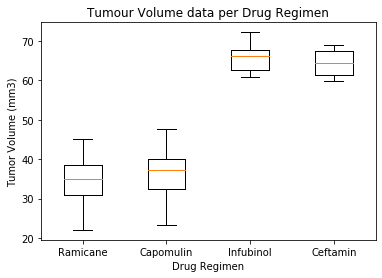

In [200]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
data = [stat_1["Tumor Volume (mm3)"], stat_2["Tumor Volume (mm3)"], stat_3["Tumor Volume (mm3)"], stat_5["Tumor Volume (mm3)"]]
drugs = (regimen_list[0], regimen_list[1], regimen_list[2], regimen_list[4])
plt.boxplot(data)

tick_locations = [1, 2, 3, 4]

plt.boxplot(data)
plt.xlabel("Drug Regimen")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumour Volume data per Drug Regimen")
plt.xticks(tick_locations, drugs)

(20, 50)

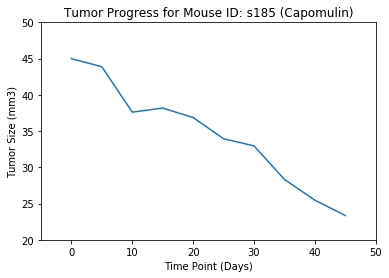

In [189]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
s185_df = data_df.copy()
id_s185_df = s185_df.groupby("Mouse ID")
s185_df = s185_df.loc[s185_df["Mouse ID"] == "s185", :]
s185_df = s185_df[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]

x_axis = s185_df["Timepoint"]
y_axis = s185_df["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)
plt.xlabel("Time Point (Days)")
plt.ylabel("Tumor Size (mm3)")
plt.title("Tumor Progress for Mouse ID: s185 (Capomulin)")
plt.xlim(-5, 50)
plt.ylim(20, 50)

Text(0, 0.5, 'Weight (g)')

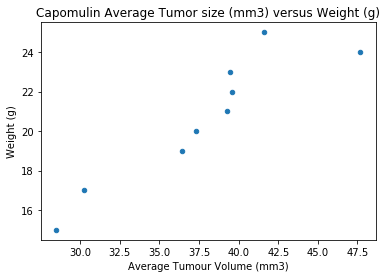

In [197]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
x_vol = []
y_wei = [15, 17, 19, 20, 21, 22, 23, 24, 25]

scat_group_df = scat_df.groupby("Weight (g)")
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(15).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(17).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(19).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(20).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(21).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(22).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(23).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(24).mean())
x_vol.append(scat_group_df["Tumor Volume (mm3)"].get_group(25).mean())

scatter_df = pd.DataFrame({
    "Average Tumour Volume (mm3)": [x_vol[0], x_vol[1], x_vol[2], x_vol[3], x_vol[4], x_vol[5], x_vol[6], x_vol[7], x_vol[8]],
    "Weight (g)": [y_wei[0], y_wei[1], y_wei[2], y_wei[3], y_wei[4], y_wei[5], y_wei[6], y_wei[7], y_wei[8]]})

scatter_df.plot.scatter(x="Average Tumour Volume (mm3)", y="Weight (g)")
plt.title("Capomulin Average Tumor size (mm3) versus Weight (g)")
plt.xlabel("Average Tumour Volume (mm3)")
plt.ylabel("Weight (g)")

In [194]:
#correlation coefficient for mouse weight and average tumor volume and for the Capomulin regimen

scat_df_corr = scatter_df.corr()
scat_df_corr
print("The Pearson 'R' Correlation is:",st.pearsonr(scatter_df["Average Tumour Volume (mm3)"], scatter_df["Weight (g)"])[0])

The Pearson 'R' Correlation is: 0.9197547128265565


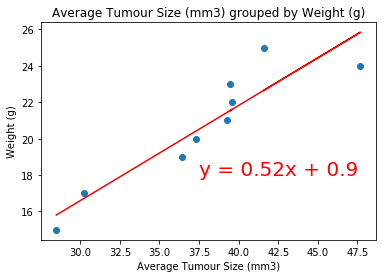

In [195]:
#linear regression model for mouse weight and average tumor volume for the Capomulin regimen
y_values = scatter_df["Weight (g)"]
x_values = scatter_df["Average Tumour Volume (mm3)"]
(slope, intercept, rvalue, pvvalue, stderr) = linregress (x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq,(37.5, 18), fontsize=20, color="red")
plt.ylabel("Weight (g)")
plt.xlabel("Average Tumour Size (mm3)")
plt.title("Average Tumour Size (mm3) grouped by Weight (g)")
plt.show()